# Laboration - Covid-19

In [72]:
# importing all the relevant packages to complete my project
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

In [73]:
# importing excel file from my data file from data downloaded from government website about covid 19
df_covid_week_sweden = pd.read_excel("../Lab_Covid/Data/Folkhalsomyndigheten_Covid19.xlsx", "Veckodata Riket")
df_covid_week_sweden.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [74]:
# viewing information about the data. There are no NaNs and all data is either an int or a float.
df_covid_week_sweden.info(), df_covid_week_sweden.describe(), df_covid_week_sweden.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

(None,
                 år  veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  \
 count   142.000000   142.000000        142.000000                  142.000000   
 mean   2020.957746    26.035211      18378.345070                  177.197183   
 std       0.797809    14.228835      38569.455753                  371.689114   
 min    2020.000000     1.000000          0.000000                    0.000000   
 25%    2020.000000    14.000000       3075.000000                   30.000000   
 50%    2021.000000    26.000000       5531.000000                   53.000000   
 75%    2022.000000    37.750000      21125.000000                  203.500000   
 max    2022.000000    53.000000     265043.000000                 2554.000000   
 
        Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  \
 count                    142.000000    1.420000e+02          142.000000   
 mean                     354.169014    1.125288e+06        10843.281690   
 std                     

In [75]:
# showing info about the columns. These are the names provided
df_covid_week_sweden.columns, df_covid_week_sweden.index

(Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
        'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
        'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
        'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
        'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
       dtype='object'),
 RangeIndex(start=0, stop=142, step=1))

In [76]:

df_covid_week_sweden.insert(0, "Vecka", df_covid_week_sweden["år"].astype(str) + "v" + df_covid_week_sweden["veckonummer"].astype(str))
df_covid_week_sweden.pop("år")
df_covid_week_sweden.pop("veckonummer")



0       6
1       7
2       8
3       9
4      10
       ..
137    38
138    39
139    40
140    41
141    42
Name: veckonummer, Length: 142, dtype: int64

In [77]:
df_covid_week_sweden

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022v38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976
138,2022v39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000
139,2022v40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024
140,2022v41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000


[Text(0.5, 1.0, 'Antal avlinda covid per vecka'),
 Text(0.5, 0, 'Antal'),
 Text(0, 0.5, 'Vecka')]

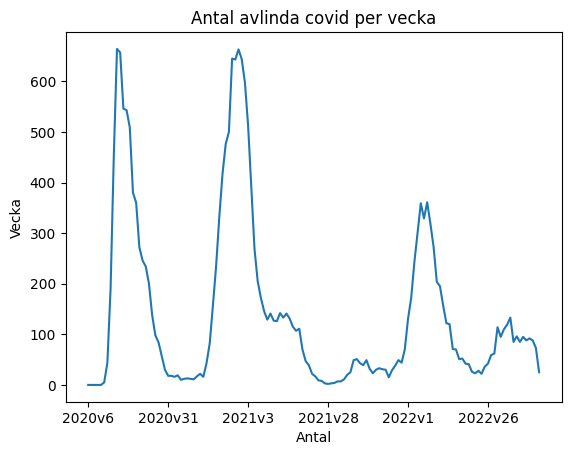

In [78]:
ax = plt.axes()
sns.lineplot(x = "Vecka", y = "Antal_avlidna_vecka", data=df_covid_week_sweden)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.set(title= "Antal avlinda covid per vecka", xlabel= "Antal", ylabel= "Vecka")



[Text(0.5, 1.0, 'Antal fall covid per vecka')]

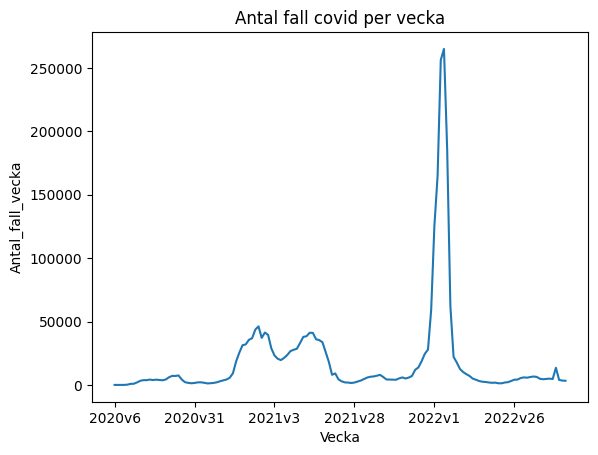

In [79]:
ax = plt.axes()

sns.lineplot(x = "Vecka", y = "Antal_fall_vecka", data=df_covid_week_sweden)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.set(title= "Antal fall covid per vecka")

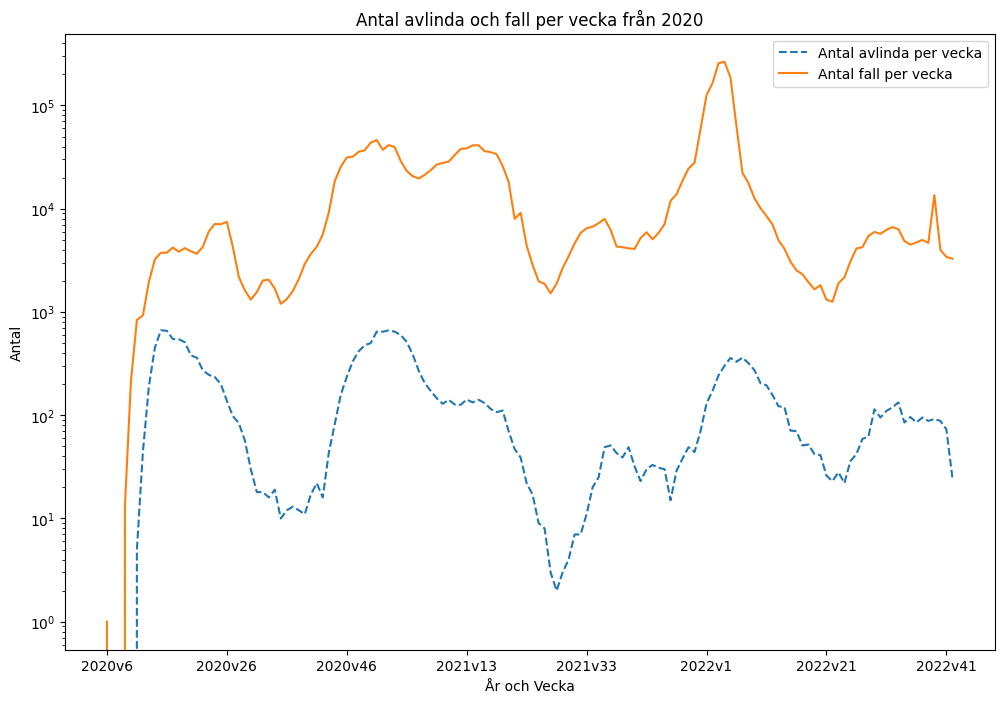

In [80]:
fig, ax = plt.subplots(figsize =(12,8))
ax = sns.lineplot(x = "Vecka", y = "Antal_avlidna_vecka", data=df_covid_week_sweden, label= "Antal avlinda per vecka", linestyle="dashed")
ax = sns.lineplot(x = "Vecka", y = "Antal_fall_vecka", data=df_covid_week_sweden, label="Antal fall per vecka")
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(xlabel = "År och Vecka", ylabel="Antal", title= "Antal avlinda och fall per vecka från 2020")
ax.set_yscale('log') # TODO Explain log

#https://www.easytweaks.com/python-plot-multiple-lines-matplotlib-seaborn/


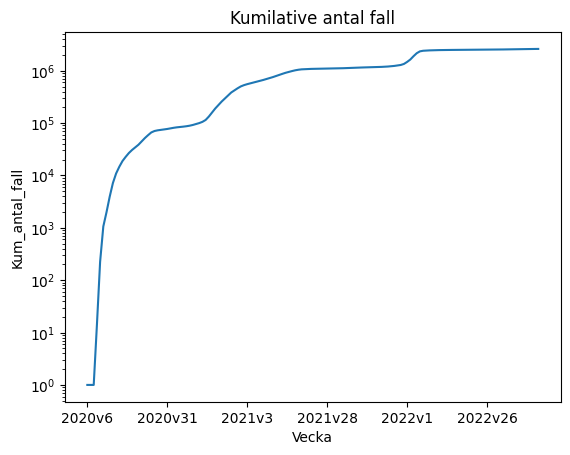

In [81]:
ax = plt.axes()

sns.lineplot(x = "Vecka", y = "Kum_antal_fall", data=df_covid_week_sweden)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.set(title= "Kumilative antal fall")
ax.set_yscale('log')

In [82]:
# TODO try to make functions from the graphs 
def plot_data_single(x,y,data,title,x_label,y_label):
    ax = plt.axes()
    sns.lineplot(x = x, y = y, data=data)
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.set(title= title, xlabel= x_label, ylabel=y_label)
    
    if data[y].max >= 100000:
        ax.set_yscale("log")
    

In [83]:
# TODO fix this so it is a for loop to loop within all the graphs
#fig, ax = plt.subplots(2,2, figsize = (16,4))

#y_columns = ["Antal_avlidna_vecka","Antal_fall_vecka",["Antal_avlidna_vecka", "Antal_fall_vecka"], "Kum_antal_fall"]
#titles= ["Antal avlinda Corona per vecka", "Antal fall Corona per vecka", "Komparison ave avlinda och fall Corona per vecka", "Kumalative antal fall Corona"]


#for i, (y_columns, titles) in enumerate(zip(y_columns, titles, ax.ravel())):
    #sns.lineplot(x ="Vecka", y = y_columns[i], data = df_covid_week_sweden, ax = ax[i])
    #ax[i].set_yscale("log")
    #ax[i].xaxis.set_major_locator(plt.MaxNLocator(7))
    #ax[i].set(title= titles, xlabel = "Vecka", y_labels = "Avtal")

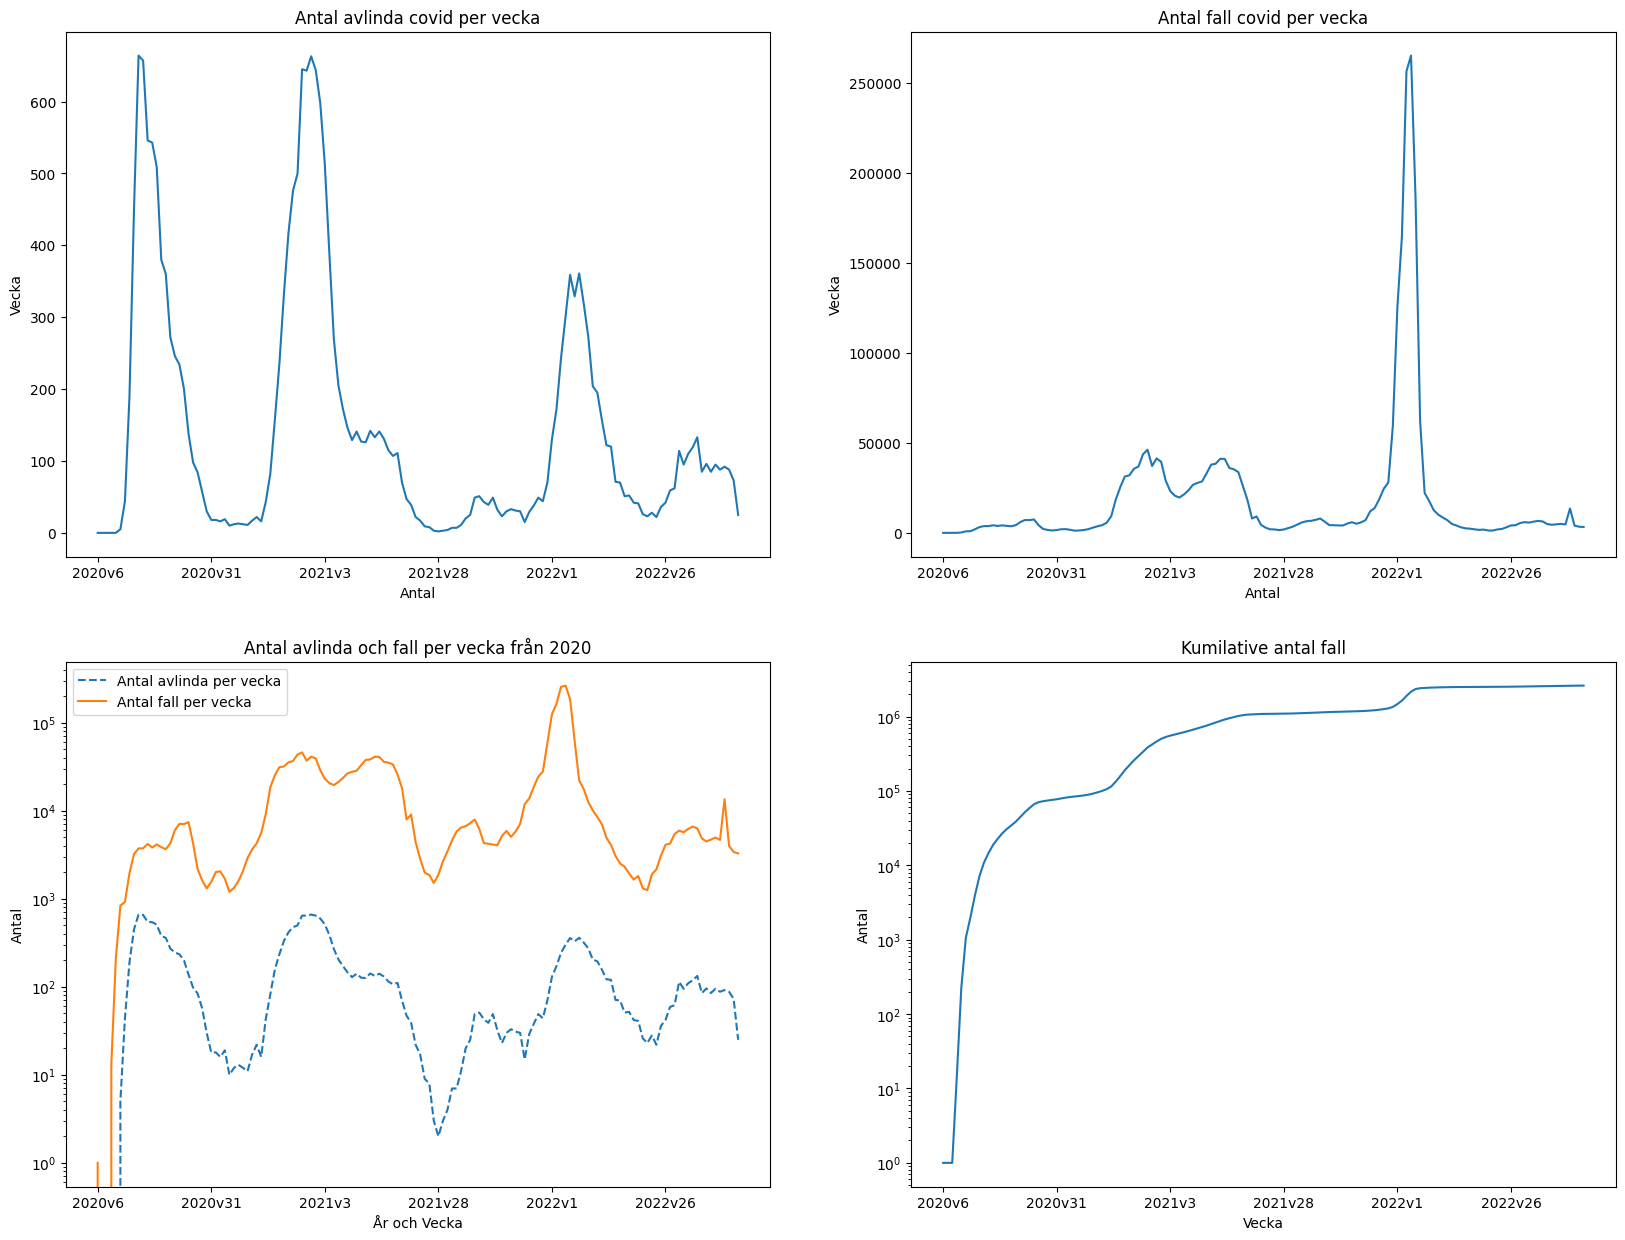

In [84]:
fig, ax = plt.subplots(2,2, figsize = (20,15))

# graph 1
sns.lineplot(ax = ax[0,0], x = "Vecka", y = "Antal_avlidna_vecka", data=df_covid_week_sweden)
ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[0,0].set(title= "Antal avlinda covid per vecka", xlabel= "Antal", ylabel= "Vecka")

# graph 2
sns.lineplot(ax = ax[0,1], x = "Vecka", y = "Antal_fall_vecka", data=df_covid_week_sweden)
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[0,1].set(title= "Antal fall covid per vecka", xlabel="Antal", ylabel= "Vecka")

#graph 3
sns.lineplot(ax=ax[1,0], x = "Vecka", y = "Antal_avlidna_vecka", data=df_covid_week_sweden, label= "Antal avlinda per vecka", linestyle="dashed")
sns.lineplot(ax=ax[1,0], x = "Vecka", y = "Antal_fall_vecka", data=df_covid_week_sweden, label="Antal fall per vecka")
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[1,0].set(xlabel = "År och Vecka", ylabel="Antal", title= "Antal avlinda och fall per vecka från 2020")
ax[1,0].set_yscale('log') # TODO Explain log

#graph 4
sns.lineplot(ax= ax[1,1], x = "Vecka", y = "Kum_antal_fall", data=df_covid_week_sweden)
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[1,1].set(title= "Kumilative antal fall", xlabel= "Vecka", ylabel= "Antal")
ax[1,1].set_yscale('log')



## plotting with plotly express

In [85]:
avlinda = px.line(df_covid_week_sweden, x= "Vecka", y= "Antal_avlidna_vecka", title= "Antal av avlidna Covid från 2020")
avlinda.show()

In [86]:
fall = px.line(df_covid_week_sweden, x= "Vecka", y= "Antal_fall_vecka", title= "Antal fall Covid per vecka från 2020")
fall.show()

In [87]:
fig = px.line(
    df_covid_week_sweden,
    x="Vecka",
    y=["Antal_avlidna_vecka", "Antal_fall_vecka"],
    title="Antal avlinda/fall Corona i en vecka från 2020",
)
fig.update_yaxes(title_text="Antal", type="log")
fig.show()


In [88]:
fall = px.line(df_covid_week_sweden, x= "Vecka", y= "Kum_antal_fall", title= "kumilative fall Covid per vecka från 2020")
fall.show()

In [89]:
# from plotly.subplots import make_subplots  # importing plotly subplots to be able to have multiple graphs in one
# import plotly.graph_objects as go

# fig = make_subplots(rows=4, cols=1)  # setting subplots as 1 column and 4 graphs(rows)

# # Graph 1
# # using append_trace to set the subplot of the graph
# fig.append_trace(go.scatter(
#     df_covid_week_sweden,
#     x="Vecka",
#     y="Antal_avlidna_vecka",
#     title="Antal av avlidna Covid från 2020",
# ), row=1, col=1) # This sets the row and column, this i will repeat for the other graphs
# # Graph 2
# fig.append_trace(go.scatter(
#     df_covid_week_sweden,
#     x="Vecka",
#     y="Antal_fall_vecka",
#     title="Antal fall Covid per vecka från 2020",
# ), row=2, col=1)
# # Graph 3
# fig.append_trace(go.scatter(
#     df_covid_week_sweden,
#     x="Vecka",
#     y=["Antal_avlidna_vecka", "Antal_fall_vecka"],
#     title="Antal avlinda/fall Corona i en vecka från 2020",
# ), row=3, col=1)
# fig.update_yaxes(title_text="Antal", type="log")
# # Graph 4
# fig.append_trace(go.scatter(
#     df_covid_week_sweden,
#     x="Vecka",
#     y="Kum_antal_fall",
#     title="kumilative fall Covid per vecka från 2020",
# ), row=4, col=1)

# fig.update_layout(height=600, width=600)  # setting the size of the subplot layout
# fig.show()


## Uppgift 2

In [90]:
df_covid_vaccine = pd.read_excel("../Lab_Covid/Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx","Vaccinerade kommun och ålder")

In [91]:
df_covid_vaccine.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [92]:
 df_covid_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Ålder                2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


In [93]:
df_covid_vaccine.columns,  df_covid_vaccine.index

(Index(['Län', 'Län_namn', 'Kommun', 'Kommun_namn', 'Ålder', 'Befolkning',
        'Antal minst 1 dos', 'Antal minst 2 doser', 'Antal 3 doser',
        'Antal 4 doser', 'Andel minst 1 dos', 'Andel minst 2 doser',
        'Andel 3 doser', 'Andel 4 doser'],
       dtype='object'),
 RangeIndex(start=0, stop=2900, step=1))

In [94]:
# a)
län_count = df_covid_vaccine.groupby("Län_namn").size()
län_count = län_count.size
print(f"There are {län_count} different Counties in this dataset about Covid 19 Vaccinations")

There are 21 different Counties in this dataset about Covid 19 Vaccinations


In [95]:
# b)
kommun_count = df_covid_vaccine.groupby("Kommun_namn").size()
kommun_count = kommun_count.size
print(f"There are {kommun_count} different Counties in this dataset about Covid 19 Vaccinations")

There are 290 different Counties in this dataset about Covid 19 Vaccinations


In [96]:
# c)

befolkning = df_covid_vaccine["Befolkning"].sum()
befolkning

print(f"The total amount of people that this chart is counted on is {befolkning}")

The total amount of people that this chart is counted on is 9092790


In [97]:
df_covid_vaccine.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [103]:
people_under_18 = df_covid_vaccine.groupby("Ålder").sum(True).reset_index()
people_under_18 

,Ålder,Län,Kommun,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,12-15,3836,400806,503831,278405,255541,0.0,0.0,162.468208,151.029976,0.000000,0.000000
1,16-17,3836,400806,241539,187077,175480,0.0,0.0,228.733824,216.427464,0.000000,0.000000
2,18-29,3836,400806,1475950,1201569,1144897,573532.0,0.0,233.827624,223.924910,104.527222,0.000000
3,30-39,3836,400806,1467590,1190083,1148376,689647.0,0.0,236.839589,229.919851,135.343053,0.000000
4,40-49,3836,400806,1298156,1117660,1095826,791299.0,0.0,250.895222,246.856228,179.174449,0.000000
5,50-59,3836,400806,1339798,1210791,1197415,1000554.0,0.0,262.627777,260.191051,220.136453,0.000000
6,60-69,3836,400806,1121922,1044061,1036035,949409.0,0.0,271.149842,269.462158,249.560855,0.000000
7,70-79,3836,400806,1033113,990440,985748,951943.0,828445.0,278.750335,277.697861,269.131467,235.192502
8,80-89,3836,400806,496750,480671,479037,468149.0,428931.0,281.317890,280.541726,274.825143,253.409767
9,90 eller äldre,3836,400806,114141,109619,109230,106717.0,97491.0,278.920890,278.111261,272.688602,251.012503


In [105]:
# d)
people_under_18 = df_covid_vaccine[(df_covid_vaccine["Ålder"]=="12-15") | (df_covid_vaccine["Ålder"] == "16-17")]["Befolkning"].sum()
print(f"The total amount of under 18 in this dataset is {people_under_18}, The population of under 18's in Sweden a")


The total amount of under 18 in this dataset is 745370, The population of under 18's in Sweden a


745370